<a href="https://colab.research.google.com/github/wanjanhasan/sportsCarDrawing/blob/main/CSE423GroupProject(SportsCar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Members: 
(All Section 10)
Adeeba Hossain       19301175
Faiza Radiah         19101288
Raisa Rahman Rodela  19301011
Nazmul Hasan Wanjan  18201133


##Installing dependencies

In [ ]:
!nvidia-smi

Sun Aug 21 05:19:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |     10MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python3 --version

Python 3.7.13


In [ ]:
!pip install -q tensorflow==1.15.0

In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install -q imageio==2.4.1

In [ ]:
import numpy as np
import math
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

##Screen

###Creating

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,800
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


##All methods used

###Circle

In [ ]:
#returns all the x and y coordinates for the zones (Serial: 1, 2, 3, 4, 5, 6, 7, 0)
def circlePoints(x, y):
  #for zone 1, 2, 3, 4, 5, 6, 7, 0
  return (x, y, -x, y, -y, x, -y, -x, -x, -y, x, -y, y, -x, y, x)

In [ ]:
#works for both origin-centered and away from the origin circles 

#full circle
def plotCircle(myPoints, cx, cy):
  #print(myPoints)
  gl.glBegin(gl.GL_POINTS)
  #zone serial 1, 2, 3, 4, 5, 6, 7, 0
  
  #cx and cy are the extra distances that need to be added to reach the x and y coordinates of a non-origin cenered circle
  gl.glVertex2f(myPoints[0]+cx, myPoints[1]+cy)
  gl.glVertex2f(myPoints[2]+cx, myPoints[3]+cy)
  gl.glVertex2f(myPoints[4]+cx, myPoints[5]+cy)
  #gl.glVertex2f(myPoints[6]+cx, myPoints[7]+cy)
  #gl.glVertex2f(myPoints[8]+cx, myPoints[9]+cy)
  #gl.glVertex2f(myPoints[10]+cx, myPoints[11]+cy)
  #gl.glVertex2f(myPoints[12]+cx, myPoints[13]+cy)
  gl.glVertex2f(myPoints[14]+cx, myPoints[15]+cy)
  gl.glEnd()

In [ ]:
# Patched Mid-point Circle Algorithm for point-based circles
def midpointCircleAlgoPatched(radius, cx, cy):
  """
  param1 --> Radius of the custom circle
  param2 --> X coordinate of the center of the custom circle
  param3 --> Y coordinate of the center of the custom circle
  """

  d= 0.01-radius
  x=0
  y=radius
  myPoints=circlePoints(x, y)
  #draw the circle
  plotCircle(myPoints, cx, cy)
  while (x<y):
    if d<0:
      #choose E
      d=d+2*x+0.03
      x=x+0.0001
    else:
      #choose SE
      d=d+2*(x-y)+0.05
      x=x+0.0001
      y=y-0.0001
    myPoints=circlePoints(x, y)
    plotCircle(myPoints, cx, cy)

In [ ]:
# Actual Mid-point Circle Algorithm for radius-based full circles
def midpointCircleAlgo(x_centre, y_centre, r, showLogs = False):
  """
  param1 --> X coordinate of the center of the circle
  param2 --> Y coordinate of the center of the circle
  param3 --> Radius of the circle
  param4 --> Shows logs when true; useful for debugging
  """

  gl.glBegin(gl.GL_POINTS)

  x, y = r, 0

  if showLogs:
    print("(", x + x_centre, ", ", y + y_centre, ")", sep = "", end = "")

  Draw(x + x_centre, y + y_centre)

  if (r > 0):
    if showLogs:
      print("(", -x + x_centre, ", ", -y + y_centre, ")", sep = "", end = "")
      print("(", y + x_centre, ", ", -x + y_centre, ")", sep = "", end = "")
      print("(", -y + x_centre, ", ", x + y_centre, ")", sep = "")
    
    Draw(-x + x_centre, -y + y_centre)
    Draw(y + x_centre, -x + y_centre)
    Draw(-y + x_centre, x + y_centre)
  
  P = 0.01 - r

  while x > y:
    y += 0.0001

    # Midpoint inside or on perimeter
    if P <= 0:
      P = P + 2 * y + 0.01
    
    # Midpoint outside perimeter
    else:
      x -= 0.0001
      P = P + 2 * y - 2 * x + 0.01
    
    # Only if all the perimeter points have been drawn
    if x < y:
      break
    
    # Draw the generated points
    if showLogs:
      print("(", x + x_centre, ", ", y + y_centre, ")", sep = "", end = "")
      print("(", -x + x_centre, ", ", y + y_centre, ")", sep = "", end = "")
      print("(", x + x_centre, ", ", -y + y_centre, ")", sep = "", end = "")
      print("(", -x + x_centre, ", ", -y + y_centre, ")", sep = "")
    
    Draw(x + x_centre, y + y_centre)
    Draw(-x + x_centre, y + y_centre)
    Draw(x + x_centre, -y + y_centre)
    Draw(-x + x_centre, -y + y_centre)

    # If x = y, the perimeter points have already been drawn
    if x != y:
      if showLogs:
        print("(", y + x_centre, ", ", x + y_centre, ")", sep = "", end = "")
        print("(", -y + x_centre, ", ", x + y_centre, ")", sep = "", end = "")
        print("(", y + x_centre, ", ", -x + y_centre, ")", sep = "", end = "")
        print("(", -y + x_centre, ", ", -x + y_centre, ")", sep = "")
      
      Draw(y + x_centre, x + y_centre)
      Draw(-y + x_centre, x + y_centre)
      Draw(y + x_centre, -x + y_centre)
      Draw(-y + x_centre, -x + y_centre)

  gl.glEnd()

# Dependencies
# Range Mapping Function
def MapRange(a, b, num):
  (a1, a2), (b1, b2) = a, b
  return b1 + ((num - a1) * (b2 - b1) / (a2 - a1))


# Point Drawing Function
def Draw(x, y):
  # mappedX = round(MapRange((-100, 100), (-1, 1), x), 2)
  # mappedY = round(MapRange((-100, 100), (-1, 1), y), 2)

  # gl.glVertex2f(mappedX, mappedY)

  gl.glVertex2f(x, y)

  gl.glVertex2f(x - 0.003, y)
  gl.glVertex2f(x - 0.004, y)
  gl.glVertex2f(x - 0.005, y)
  # gl.glVertex2f(x - 0.006, y)
  # gl.glVertex2f(x - 0.007, y)
  # gl.glVertex2f(x - 0.008, y)
  
  gl.glVertex2f(x + 0.003, y)
  gl.glVertex2f(x + 0.004, y)
  gl.glVertex2f(x + 0.005, y)
  # gl.glVertex2f(x + 0.006, y)
  # gl.glVertex2f(x + 0.007, y)
  # gl.glVertex2f(x + 0.008, y)

  gl.glVertex2f(x, y - 0.003)
  gl.glVertex2f(x, y - 0.004)
  gl.glVertex2f(x, y - 0.005)
  # gl.glVertex2f(x, y - 0.006)
  # gl.glVertex2f(x, y - 0.007)
  # gl.glVertex2f(x, y - 0.008)
  
  gl.glVertex2f(x, y + 0.003)
  gl.glVertex2f(x, y + 0.004)
  gl.glVertex2f(x, y + 0.005)
  # gl.glVertex2f(x, y + 0.006)
  # gl.glVertex2f(x, y + 0.007)
  # gl.glVertex2f(x, y + 0.008)


### Line

In [ ]:
def findZone(x0, y0, x1, y1):
  dx=x1-x0
  dy=y1-y0
  
  if(abs(dx)>abs(dy)): 
    #zone 0/3/4/7
    if(dx>=0 and dy>=0):
      return 0
    if(dx>=0 and dy<0):
      return 7
    if(dx<0 and dy>=0):
      return 3
    if(dx<0 and dy<0):
      return 4

  else:       
    #zone1/2/5/6
    if(dx>=0 and dy>=0):
      return 1
    if(dx>=0 and dy<0):
      return 6
    if(dx<0 and dy>=0):
      return 2
    if(dx<0 and dy<0):
      return 5

In [ ]:
def convertToZone0(x0, y0, x1, y1, zone):
  #if zone==0:
    #return x0, y0, x1, y1
  if zone==1:
    return y0, x0, y1, x1
  elif zone==2:
    return -y0, x0, -y1, x1
  elif zone==3:
    return -x0, y0, -x1, y1
  elif zone==4:
    return -x0, -y0, -x1, -y1
  elif zone==5:
    return -y0, -x0, -y1, -x1
  elif zone==6:
    return y0, -x0, y1, -x1
  else:
    return x0, -y0, x1, -y1

In [ ]:
def mapToOriginal(x, y, zone):
  if zone==0:
    return x, y
  elif zone==1:
    return y, x
  elif zone==2:
    return -y, x
  elif zone==3:
    return -x, y
  elif zone==4:
    return -x, -y
  elif zone==5:
    return -y, -x
  elif zone==6:
    return y, -x
  else:
    return x, -y

In [ ]:
#P.S. This algorithm works in both direction
def midpointLineAlgo(x0, y0, x1, y1):
  zone=findZone(x0, y0, x1, y1)                    #pass params
  #print(zone)
  if zone!=0:
    x0, y0, x1, y1=convertToZone0(x0, y0, x1, y1, zone)               #set params
  #actual algorithm part
  dx=x1-x0
  dy=y1-y0
  d=2*dy-dx
  incE= 2*dy
  incNE=2*(dy-dx)
  y=y0
  x=x0
  gl.glBegin(gl.GL_POINTS)
  while (x<=x1):
    a, b=mapToOriginal(x, y, zone)
    gl.glVertex2f(a, b)
    if(d>0):
      d=d +incNE
      y+=0.0001 
    else:
      d=d+incE
    x+=0.0001
  gl.glEnd()

###LineClip and point draw

In [ ]:
from numpy import random
def pointDraw():
  randomx=random.rand(100)
  randomy=random.rand(100)
  for position in range(len(randomx)):
    gl.glBegin(gl.GL_POINTS) 
    if position%3==0:
      gl.glVertex2f(randomx[position],randomy[position])
      if position%2==0:
        gl.glVertex2f((-1)*randomx[position],randomy[position])
    else:
      if position%5==0:
        gl.glVertex2f(-1*randomx[position],-1*randomy[position])
      gl.glVertex2f(randomx[position],-1*randomy[position])
    gl.glEnd()

In [ ]:
min_x=-0.95
max_x=0.95
min_y=-0.95
max_y=0.95
def outcode(endPoint):
    point_outcode=[0, 0, 0, 0]
    x_p1=endPoint[0]
    y_p1=endPoint[1]
    
    if (y_p1>max_y): point_outcode[0]=1                 #top
    if (y_p1<min_y): point_outcode[1]=1                 #bottom
    if (x_p1<min_x): point_outcode[2]=1                 #left
    if (x_p1>max_x): point_outcode[3]=1                 #right
    return point_outcode

##Drawing 

###Clearing screen+Rendering (Only this section should be run multiple times)


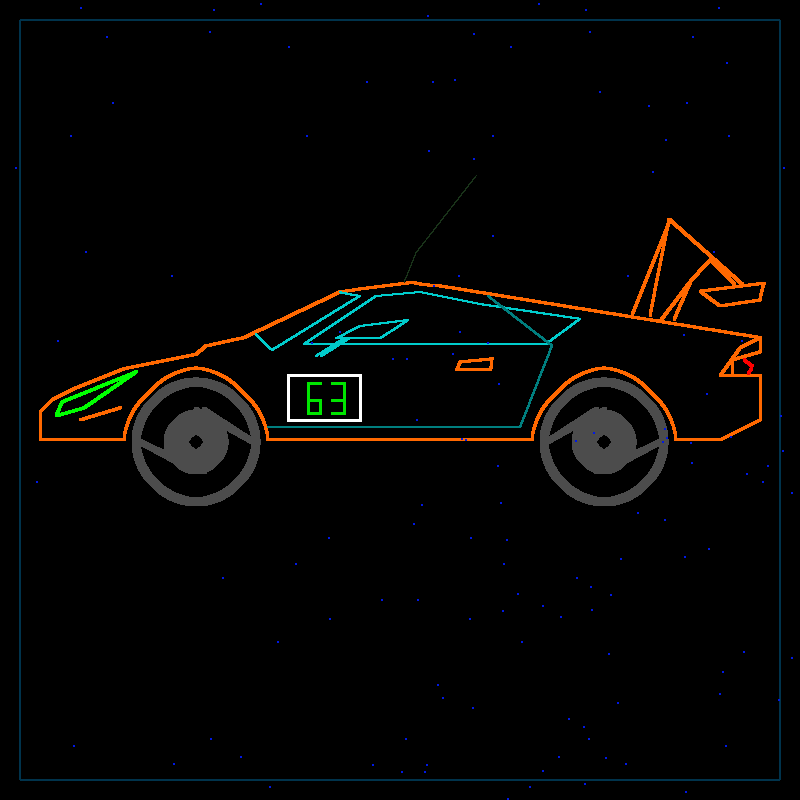

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


gl.glColor3f(1,0,0)
#Door range(Must be deleted later)
# midpointLineAlgo(-0.51, 0.114, 0.12, 0.16)
#Door
gl.glColor3f(1,.4078,0)
gl.glPointSize(3)

#Everything has been drawn clockwise 
#P.S. The flaw with this line drawing algorithm...doesn't work top to bottom on a line parallel to y-axis, also right to left on a line parallel to x-axis

#front hood space
midpointLineAlgo(-0.9, -0.1, -0.9, -0.03)
midpointLineAlgo(-0.9, -0.1, -0.69, -0.1)
midpointLineAlgo(-0.9, -0.03, -0.87, 0)
midpointLineAlgo(-0.87, 0, -0.81, 0.03)
midpointLineAlgo(-0.81, 0.03, -0.78, 0.042)
midpointLineAlgo(-0.78, 0.042, -0.75, 0.054)
midpointLineAlgo(-0.75, 0.054, -0.72, 0.066)
midpointLineAlgo(-0.72, 0.066, -0.69, 0.078)
midpointLineAlgo(-0.69, 0.078, -0.60, 0.096)
midpointLineAlgo(-0.60, 0.096, -0.51, 0.114)
midpointLineAlgo(-0.51, 0.114, -0.486, 0.135)
midpointLineAlgo(-0.486, 0.135, -0.39, 0.156)

#Front glass space
midpointLineAlgo(-0.39, 0.156, -0.15, 0.27)


#roof
midpointLineAlgo(-0.15, 0.27, -0.09, 0.279)
midpointLineAlgo(-0.09, 0.279, 0.03, 0.294)
midpointLineAlgo(0.03, 0.294, 0.06, 0.288)
midpointLineAlgo(0.06, 0.288, 0.09, 0.2865)
midpointLineAlgo(0.09, 0.2865, 0.12, 0.282)

#rear
midpointLineAlgo(0.12, 0.282, 0.9, 0.156)
midpointLineAlgo(0.85, 0.13, 0.9, 0.156)
midpointLineAlgo(0.8, 0.06, 0.85, 0.13)
midpointLineAlgo(0.8, 0.06, 0.9, 0.06)
midpointLineAlgo(0.9, -0.05, 0.9, 0.06)
midpointLineAlgo(0.9, -0.05, 0.8, -0.1)
midpointLineAlgo(0.69, -0.1, 0.8, -0.1)

#
midpointLineAlgo(-0.7,-0.02,-0.8,-0.05)


#
gl.glPointSize(1)
gl.glColor3f(0.1,0.2,0.1)
midpointLineAlgo(0.01,0.294,0.04,0.368)
midpointLineAlgo(0.04,0.368,0.19,0.56)

gl.glPointSize(3)
gl.glColor3f(1,.4078,0)
#rear spoiler
midpointLineAlgo(0.8,0.235,0.9,0.25)
midpointLineAlgo(0.9,0.255,0.91,0.292)
midpointLineAlgo(0.8,0.235,0.75,0.272)
midpointLineAlgo(0.75,0.272,0.91,0.292)

midpointLineAlgo(0.652,0.199,0.728,0.299)
midpointLineAlgo(0.728,0.299,0.775,0.35)
midpointLineAlgo(0.775,0.35,0.835,0.292)

midpointLineAlgo(0.58,0.212,0.675,0.45)
midpointLineAlgo(0.675,0.45,0.855,0.29)
midpointLineAlgo(0.625,0.212,0.672,0.45)
midpointLineAlgo(0.685,0.201,0.728,0.299)


gl.glColor3f(1,1,1)

#number box
midpointLineAlgo(-0.28,0.06,-0.10,0.06)
midpointLineAlgo(-0.28,-0.051,-0.10,-0.051)
midpointLineAlgo(-0.28,-0.051,-0.28,0.06)
midpointLineAlgo(-0.10,-0.051,-0.10,0.06)

gl.glColor3f(0,0.9,0)
#number
midpointLineAlgo(-0.23,0.04,-0.20,0.04)
midpointLineAlgo(-0.23,-0.035,-0.20,-0.035)
midpointLineAlgo(-0.23,-0.035,-0.23,0.04)
midpointLineAlgo(-0.23,-0.001,-0.20,-0.001)
midpointLineAlgo(-0.20,-0.035,-0.20,-0.001)
midpointLineAlgo(-0.17,0.04,-0.14,0.04)
midpointLineAlgo(-0.17,-0.035,-0.14,-0.035)
midpointLineAlgo(-0.14,-0.035,-0.14,0.04)
midpointLineAlgo(-0.17,-0.001,-0.14,-0.001)

gl.glColor3f(1,.4078,0)

#door handle
midpointLineAlgo(0.15,0.095,0.231,0.103)
midpointLineAlgo(0.142,0.075,0.227,0.077)
midpointLineAlgo(0.142,0.075,0.15,0.095)
midpointLineAlgo(0.227,0.077,0.229,0.101)


#wheel well
#right
midpointCircleAlgoPatched(0.18, 0.51, -0.1)
#left
midpointCircleAlgoPatched(0.18, -0.51, -0.1)

#Join
midpointLineAlgo(-0.33, -0.1, 0.33, -0.1)

gl.glPointSize(5)
gl.glLineWidth(2)

gl.glColor3f(0.3,0.3,0.3)
# Wheels
# Left
midpointCircleAlgo(-0.51, -0.105, 0.15)
# Right
midpointCircleAlgo(0.51, -0.105, 0.15)


# Wheel-rim Left
# Center
midpointCircleAlgo(-0.51, -0.105, 0.07)

midpointCircleAlgo(-0.51, -0.105, 0.03)

midpointCircleAlgo(-0.51, -0.105, 0.05)



# Wheel-rim Right
# Center
midpointCircleAlgo(0.51, -0.105, 0.07)

midpointCircleAlgo(0.51, -0.105, 0.03)

midpointCircleAlgo(0.51, -0.105, 0.05)

# Patterns


# Patterns


#left rim

midpointLineAlgo(-0.51, -0.025, -0.37, -0.103)
midpointLineAlgo(-0.49, -0.025, -0.37, -0.103)



midpointLineAlgo(-0.51, -0.18, -0.65, -0.105)
midpointLineAlgo(-0.49, -0.18, -0.65, -0.105)

#right rim

midpointLineAlgo(0.51, -0.025, 0.37, -0.103)
midpointLineAlgo(0.49, -0.025, 0.37, -0.103)


midpointLineAlgo(0.51, -0.18, 0.65, -0.105)
midpointLineAlgo(0.49, -0.18, 0.65, -0.105)





gl.glPointSize(3)


gl.glColor3f(0,1,0)

# Headlight
midpointLineAlgo(-0.8 - 0.06, -0.05 + 0.01, -0.73 - 0.06, -0.03 + 0.01)
midpointLineAlgo(-0.8 - 0.06, -0.05 + 0.01, -0.785 - 0.06, -0.015 + 0.01)
midpointLineAlgo(-0.785 - 0.06, -0.015 + 0.01, -0.6 - 0.06, 0.06 + 0.01)
midpointLineAlgo(-0.73 - 0.06, -0.03 + 0.01, -0.6 - 0.06, 0.06 + 0.01)

gl.glColor3f(1,.4078,0)

# Backlight
# Bounds
midpointLineAlgo(0.83, 0.06, 0.83, 0.1)
midpointLineAlgo(0.83, 0.06, 0.88, 0.06)
midpointLineAlgo(0.83, 0.1, 0.9, 0.12)

gl.glColor3f(1,0,0)
# Bulb
midpointLineAlgo(0.85 + 0.02, 0.06 + 0.005, 0.86 + 0.02, 0.08)
midpointLineAlgo(0.84 + 0.02, 0.1, 0.86 + 0.02, 0.08 + 0.005)

gl.glColor3f(1,.4078,0)
# Placement-line
midpointLineAlgo(0.9, 0.12, 0.9, 0.15)






gl.glColor3f(0,.8,0.8)


#front glass
gl.glPointSize(2.5)
midpointLineAlgo(-0.32,0.125,-0.101,0.26)
midpointLineAlgo(-0.32,0.125,-0.36,0.164)
midpointLineAlgo(-0.101,0.26,-0.15,0.269)

#up glass
gl.glPointSize(2.5)
midpointLineAlgo(-0.24,0.14,0.365,0.14)
midpointLineAlgo(0.365,0.14,0.45,0.203)
midpointLineAlgo(0.45,0.203,0.20,0.24)
midpointLineAlgo(-0.06,0.26, .05, 0.27) 
midpointLineAlgo(.05, 0.27,0.20,0.24)
midpointLineAlgo(-0.06,0.26,-0.24,0.14)

#looking glass
midpointLineAlgo(-0.24+.03,0.06+0.05,-0.21+.07,0.104+0.05)
midpointLineAlgo(-0.227+.03,0.06+0.05,-0.197+.07,0.104+0.05)
midpointLineAlgo(-0.21+.05,0.104+0.05,-0.1+.05,0.104+0.05)
midpointLineAlgo(-0.1+.05,0.104+0.05,-0.08+.1,0.15+0.05)
midpointLineAlgo(-0.08+.1,0.15+0.05,-0.2+.1,0.135+0.05)
midpointLineAlgo(-0.2+.1,0.135+0.05,-0.21+.05,0.104+0.05)

gl.glColor3f(0,.5,0.5)

#door
midpointLineAlgo(-0.33, -0.068, 0.30, -0.068)
midpointLineAlgo(0.38,0.136,0.22,0.26)
midpointLineAlgo(0.38,0.136,0.30,-0.068)


gl.glColor3f(0,.2,0.3)


#Frame


gl.glBegin(gl.GL_LINES)
#left line
gl.glVertex2f(-.95, .95)
gl.glVertex2f(-0.95, -0.95)
#right line
gl.glVertex2f(.95, .95)
gl.glVertex2f(0.95, -0.95)
#top line
gl.glVertex2f(-.95, .95)
gl.glVertex2f(0.95, 0.95)
#bottom line
gl.glVertex2f(-.95, -.95)
gl.glVertex2f(0.95, -0.95)
gl.glEnd()

gl.glColor3f(0,.1,0.9)

pointDraw()



img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)